In [1]:
import torchvision
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader

import os
import torch.optim as optim
import torch.nn as nn
import torch
import torch.nn as nn
import torch.nn.functional as F


total_fase = 2 
save_model = False
load_model = False
device = "cuda"
data_dir = "../data" 
batch_size = 32

In [28]:


# Transformaciones para normalizar los datos
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)

eval_data = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)
eval_dataloader = torch.utils.data.DataLoader(eval_data, batch_size=1000, shuffle=False, num_workers=2)

# Separar las clases 0-4 y 5-9 para los conjuntos de entrenamiento y evaluación

# Conjunto de entrenamiento
train_indices_0_to_4 = [i for i in range(len(train_data)) if train_data.targets[i] < 5]
train_indices_5_to_9 = [i for i in range(len(train_data)) if train_data.targets[i] >= 5]

train_0_to_4 = torch.utils.data.Subset(train_data, train_indices_0_to_4)
train_5_to_9 = torch.utils.data.Subset(train_data, train_indices_5_to_9)

# Conjunto de evaluación
eval_indices_0_to_4 = [i for i in range(len(eval_data)) if eval_data.targets[i] < 5]
eval_indices_5_to_9 = [i for i in range(len(eval_data)) if eval_data.targets[i] >= 5]

eval_0_to_4 = torch.utils.data.Subset(eval_data, eval_indices_0_to_4)
eval_5_to_9 = torch.utils.data.Subset(eval_data, eval_indices_5_to_9)
 
train_dataloader = DataLoader(train_data, batch_size, shuffle=True)
train_0_to_4_dataloader = DataLoader(train_0_to_4, batch_size, shuffle=True)
train_5_to_9_dataloader = DataLoader(train_5_to_9, batch_size, shuffle=True)

eval_0_to_4_dataloader = DataLoader(eval_0_to_4, batch_size, shuffle=True)
eval_5_to_9_dataloader = DataLoader(eval_5_to_9, batch_size, shuffle=True)
eval_dataloader = DataLoader(eval_data, batch_size=10000, shuffle=True)
print("Se cargaron los datos correctamente")


Files already downloaded and verified
Files already downloaded and verified
Se cargaron los datos correctamente


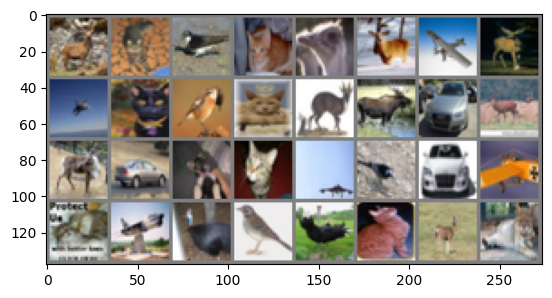

 deer   cat  bird   cat


In [36]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Función para mostrar imágenes
def imshow(img):
    img = img / 2 + 0.5     # Des-normalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtén un lote de datos de entrenamiento
for images, labels in train_0_to_4_dataloader:
    # Muestra imágenes
    imshow(torchvision.utils.make_grid(images))
    # Imprime etiquetas
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    break  # Solo mostramos un lote de imágenes
